## Fastai Lesson 3

In [6]:
from fastai.vision.all import *
from utils import *

### Mnist workout

In [8]:
path = untar_data(URLs.MNIST_SAMPLE)

In [10]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/valid')]

In [14]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [46]:
threes = (path/'train/3').ls().sorted()
sevens = (path/'train/7').ls().sorted()


In [17]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [21]:
array(im3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [26]:
tensor(im3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [102]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4: 15, 4: 22])
df.style.set_properties(**{'font-size': '10pt', 'background-color': 'red', 
                          'color':'red',
                          'align': 'center'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [47]:
sevens

(#6265) [Path('/root/.fastai/data/mnist_sample/train/7/10002.png'),Path('/root/.fastai/data/mnist_sample/train/7/1001.png'),Path('/root/.fastai/data/mnist_sample/train/7/10014.png'),Path('/root/.fastai/data/mnist_sample/train/7/10019.png'),Path('/root/.fastai/data/mnist_sample/train/7/10039.png'),Path('/root/.fastai/data/mnist_sample/train/7/10046.png'),Path('/root/.fastai/data/mnist_sample/train/7/10050.png'),Path('/root/.fastai/data/mnist_sample/train/7/10063.png'),Path('/root/.fastai/data/mnist_sample/train/7/10077.png'),Path('/root/.fastai/data/mnist_sample/train/7/10086.png')...]

In [49]:
sevens_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(sevens_tensors), len(three_tensors)

(6265, 6131)

<AxesSubplot:>

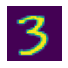

In [52]:
show_image(three_tensors[1])

In [55]:
print(three_tensors[1].shape)
print(type(three_tensors))

torch.Size([28, 28])
<class 'list'>


In [66]:
stacked_sevens = torch.stack(sevens_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

In [67]:
stacked_sevens.shape

torch.Size([6265, 28, 28])

<AxesSubplot:>

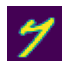

In [68]:
show_image(stacked_sevens[1])

<AxesSubplot:>

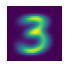

In [72]:
show_image(stacked_threes.mean(0))

<AxesSubplot:>

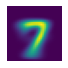

In [74]:
show_image(stacked_sevens.mean(0))